# Instalação de recursos necessários

Para a análise do projeto é necessário que se instale as seguintes bibliotecas:

* !pip install pandas
* !pip install matplotlib
* !pip install opnpyxl
* !pip install seaborn

In [ ]:
#importar bibliotecas

!pip install pandas
!pip install matplotlib
!pip install opnpyxl
!pip install seaborn

# Preparação do data set

* Para a preparação do dataset, é necessário realizar o download dos arquivos disponíveis na seção de dados abertos do site Gov.br. Para a análise do projeto, recomenda-se o download de dados de pelo menos dois meses.
* Os arquivos devem ser processados no Jupyter utilizando Python. Durante a mesclagem dos datasets, é essencial configurar corretamente o delimitador dos arquivos CSV, que neste caso é o ponto e vírgula (;), e definir o encoding como 1252 para tratar adequadamente os caracteres especiais e evitar problemas de formatação.

In [ ]:
#importar os dados da planilha csv

import pandas as pd

tabela_01 = pd.read_csv("EDA_Manipulados_202101.csv", delimiter=";", encoding="1252")
tabela_02 = pd.read_csv("EDA_Manipulados_202102.csv", delimiter=";", encoding="1252")
tabela_03 = pd.read_csv("EDA_Manipulados_202103.csv", delimiter=";", encoding="1252")
tabela_04 = pd.read_csv("EDA_Manipulados_202104.csv", delimiter=";", encoding="1252")
tabela_05 = pd.read_csv("EDA_Manipulados_202105.csv", delimiter=";", encoding="1252")
tabela_06 = pd.read_csv("EDA_Manipulados_202106.csv", delimiter=";", encoding="1252")
tabela_07 = pd.read_csv("EDA_Manipulados_202107.csv", delimiter=";", encoding="1252")
tabela_08 = pd.read_csv("EDA_Manipulados_202108.csv", delimiter=";", encoding="1252")
tabela_09 = pd.read_csv("EDA_Manipulados_202109.csv", delimiter=";", encoding="1252")
tabela_10 = pd.read_csv("EDA_Manipulados_202110.csv", delimiter=";", encoding="1252")
tabela_11 = pd.read_csv("EDA_Manipulados_202111.csv", delimiter=";", encoding="1252")

tabela = pd.concat([tabela_01, tabela_02, tabela_03, tabela_04, tabela_05, tabela_06, tabela_07, tabela_08, tabela_09, tabela_10, tabela_11])

display(tabela)


# Questão 1 - Quais são as características principais do dataset?
* O dataset contém informações detalhadas sobre a venda de medicamentos manipulados sujeitos à escrituração no SNGPC (Sistema Nacional de Gerenciamento de Produtos Controlados), provenientes de farmácias e drogarias privadas. Ele registra as movimentações de medicamentos controlados, com dados organizados mensalmente. Os dados abrangem informações como ano, mês, localização (UF e município) da venda, princípio ativo, quantidade e tipo de unidade farmacotécnica, e detalhes sobre a prescrição, como o conselho de classe e o tipo de receituário utilizado. Para medicamentos antimicrobianos, há campos adicionais, como CID10, sexo, idade e unidade de medida da idade. 

# Questão 2

Quais padrões ou tendências podem ser observados nos dados?



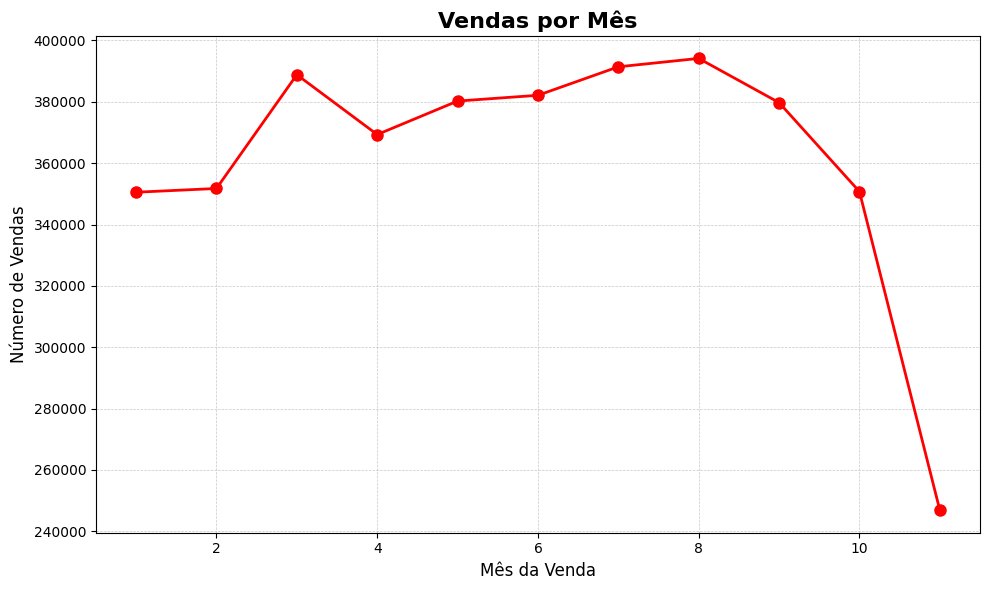

In [ ]:
#Criando gráfico de linha de tendência

import matplotlib.pyplot as plt

vendas_por_mes = tabela.groupby(['MES_VENDA']).size()

plt.figure(figsize=(10, 6)) 
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

# Adicionando título e rótulos
plt.title('Vendas por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês da Venda', fontsize=12) 
plt.ylabel('Número de Vendas', fontsize=12)  

# Personalizando o gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  

# Exibindo o gráfico
plt.tight_layout()  
plt.show()



# Questão 3

Como os dados foram preparados para análise?

* Para a preparação da análise foi feito um agrupamento de dados no ano de 2021 por mês, onde é feito um groupby da coluna 'MES_VENDA' passando como parametro um método size para realizar a contagem de cada ocorrencia por mês. Retornando os dados do agrupamento é realizado a preparação do gráfico para demonstrar a tendência de venda de medicamentos durante o período de 11 meses.



# Questão 4

# Que insights podem ser extraídos a partir de visualizações gráficas?



# Questão 5

# Quais são as conclusões macros dos dados analisados?

carnaval e invrno

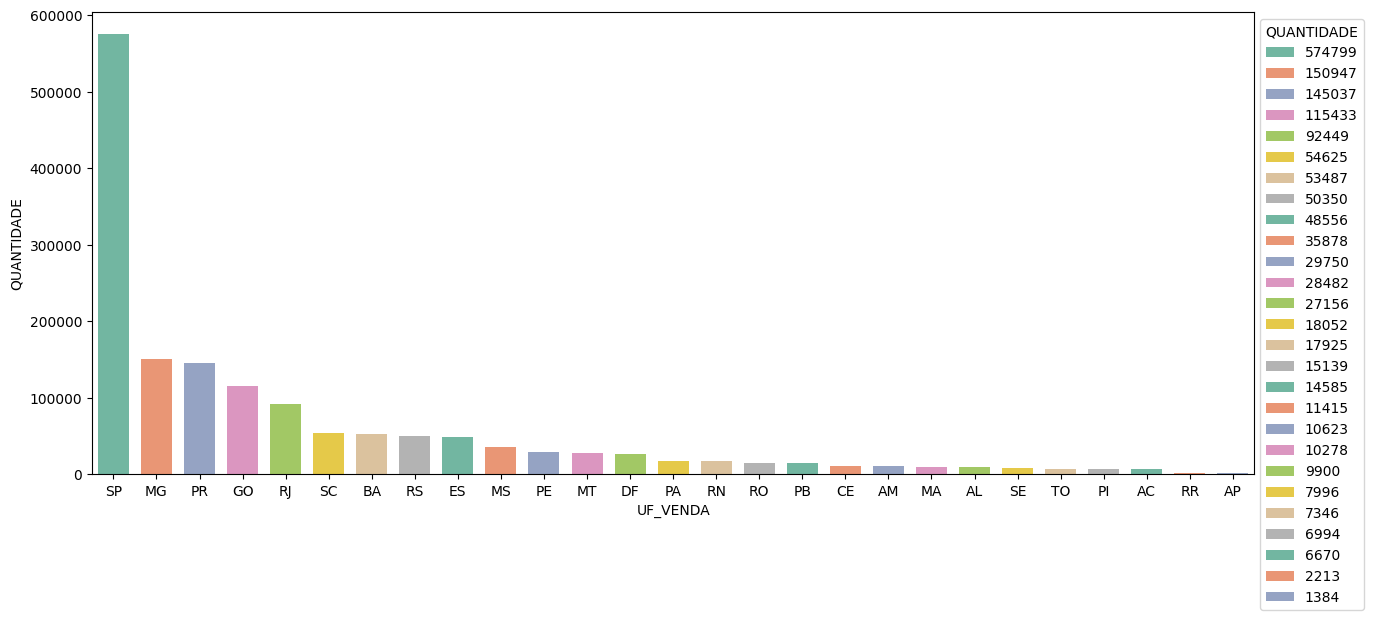

In [65]:
# Questão 6

# Qual a quantidade vendida em cada estado durante o inverno?

import matplotlib.pyplot as plt


vendas_uf = tabela.query('MES_VENDA >= 6').query('MES_VENDA <= 9').groupby('UF_VENDA').size().reset_index(name='QUANTIDADE').sort_values(by='QUANTIDADE', ascending=False)

plt.figure(figsize=(15, 6))
bp = sns.barplot(data=vendas_uf, x='UF_VENDA', y='QUANTIDADE', palette='Set2', hue='QUANTIDADE', hue_order=vendas_uf['QUANTIDADE'], errorbar=None, gap=0.1)
sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1))


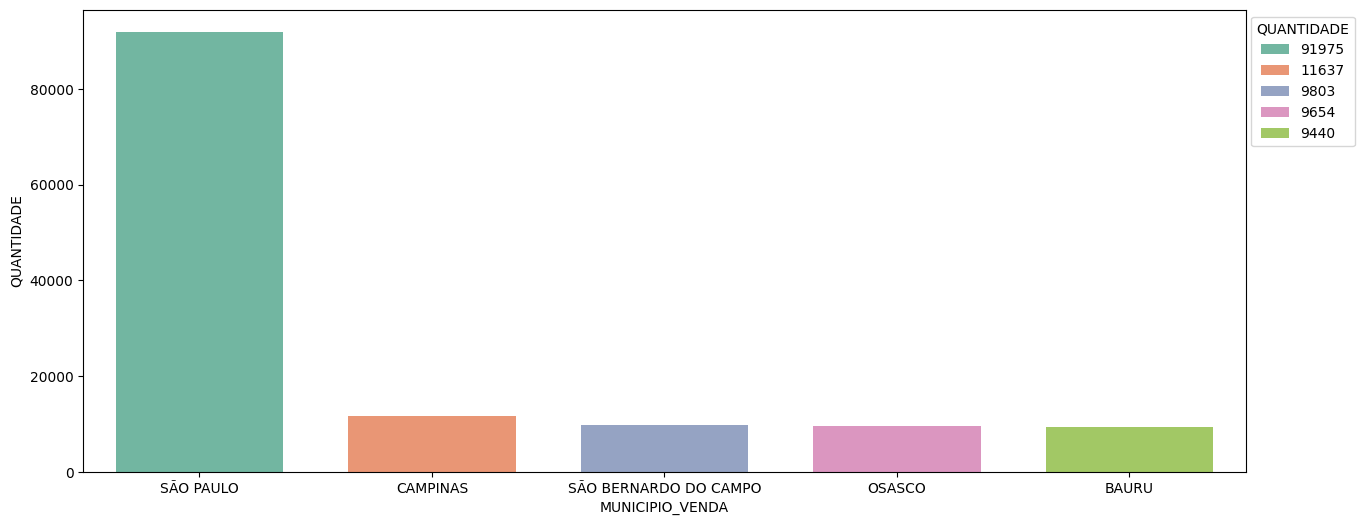

In [ ]:
# Questão 7

# Quais os 5 maiores municipios de São Paulo com vendas de medicamentos durante o inverno?

import matplotlib.pyplot as plt


vendas_municipio_sp = tabela.query('MES_VENDA >= 6').query('MES_VENDA <= 9').query('UF_VENDA == "SP"').groupby('MUNICIPIO_VENDA').size().reset_index(name='QUANTIDADE').sort_values(by='QUANTIDADE', ascending=False).head()

plt.figure(figsize=(15, 6))
bp = sns.barplot(data=vendas_municipio_sp, x='MUNICIPIO_VENDA', y='QUANTIDADE', palette='Set2', hue='QUANTIDADE', hue_order=vendas_municipio_sp['QUANTIDADE'], errorbar=None, gap=0.1)
sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1))


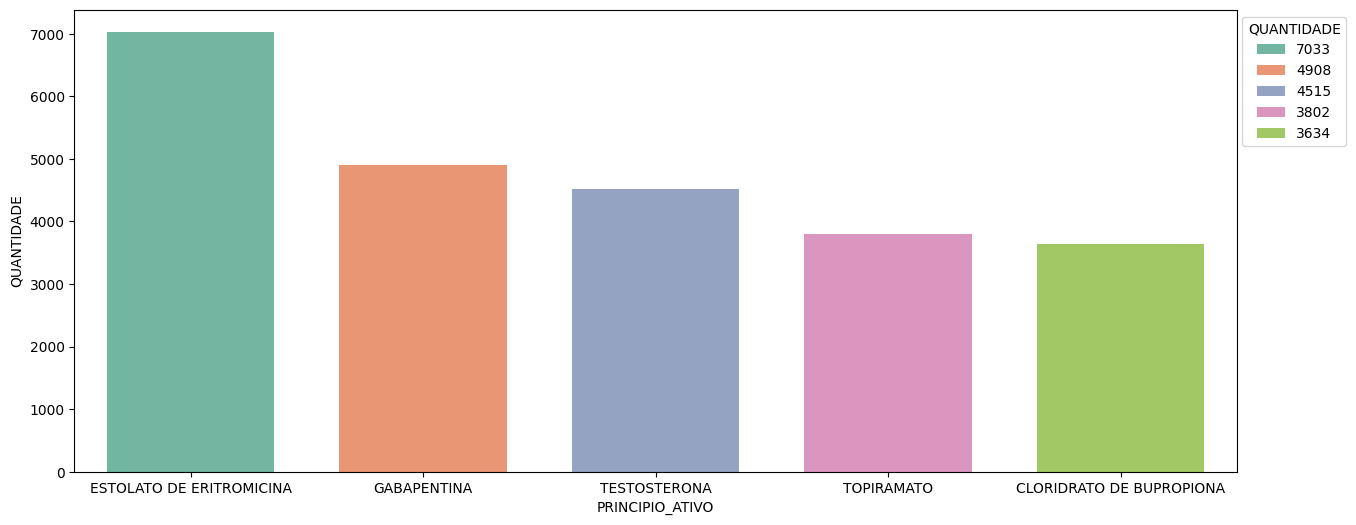

In [ ]:
# Questão 8

# 

import matplotlib.pyplot as plt


vendas_municipio_sp_medicamento = tabela.query('MES_VENDA >= 6').query('MES_VENDA <= 9').query('UF_VENDA == "SP"').query('MUNICIPIO_VENDA == "SÃO PAULO"').groupby('PRINCIPIO_ATIVO').size().reset_index(name='QUANTIDADE').sort_values(by='QUANTIDADE', ascending=False).head()

plt.figure(figsize=(15, 6))
bp = sns.barplot(data=vendas_municipio_sp_medicamento, x='PRINCIPIO_ATIVO', y='QUANTIDADE', palette='Set2', hue='QUANTIDADE', hue_order=vendas_municipio_sp_medicamento['QUANTIDADE'], errorbar=None, gap=0.1)
sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1))

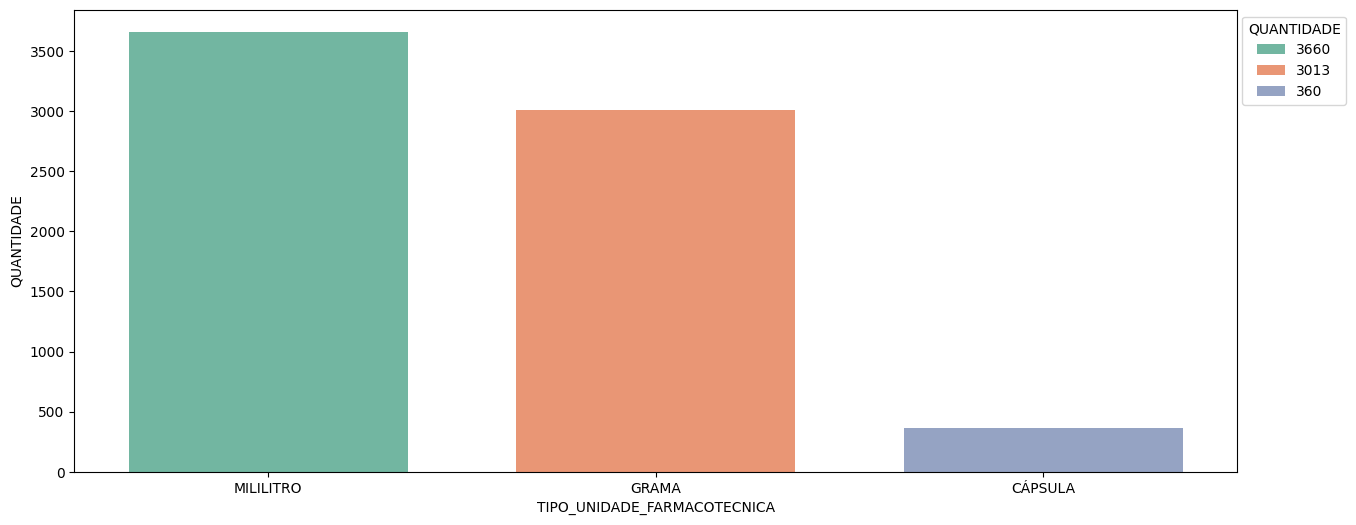

In [84]:
# Questão 9

import matplotlib.pyplot as plt


vendas_municipio_sp_medicamento_tipo = tabela.query('MES_VENDA >= 6').query('MES_VENDA <= 9').query('UF_VENDA == "SP"').query('MUNICIPIO_VENDA == "SÃO PAULO"').query('PRINCIPIO_ATIVO == "ESTOLATO DE ERITROMICINA"').groupby('TIPO_UNIDADE_FARMACOTECNICA').size().reset_index(name='QUANTIDADE').sort_values(by='QUANTIDADE', ascending=False).head()

plt.figure(figsize=(15, 6))
bp = sns.barplot(data=vendas_municipio_sp_medicamento_tipo, x='TIPO_UNIDADE_FARMACOTECNICA', y='QUANTIDADE', palette='Set2', hue='QUANTIDADE', hue_order=vendas_municipio_sp_medicamento_tipo['QUANTIDADE'], errorbar=None, gap=0.1)
sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1))

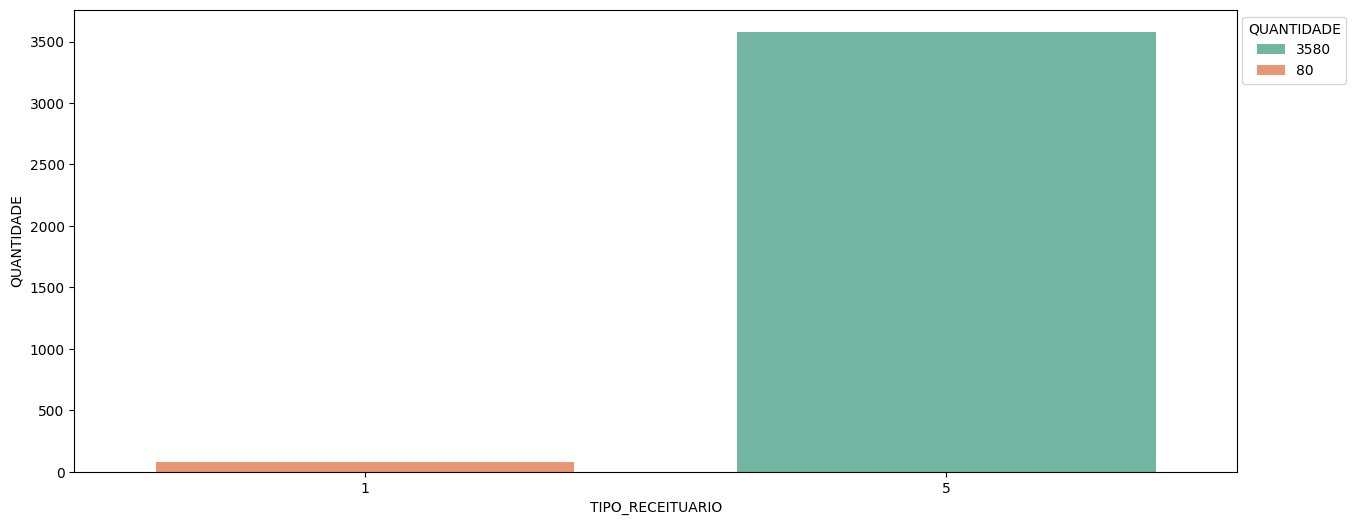

In [87]:
# Questão 10

import matplotlib.pyplot as plt


vendas_municipio_sp_medicamento_tipo_receituario = tabela.query('MES_VENDA >= 6').query('MES_VENDA <= 9').query('UF_VENDA == "SP"').query('MUNICIPIO_VENDA == "SÃO PAULO"').query('PRINCIPIO_ATIVO == "ESTOLATO DE ERITROMICINA"').query('TIPO_UNIDADE_FARMACOTECNICA == "MILILITRO"').groupby('TIPO_RECEITUARIO').size().reset_index(name='QUANTIDADE').sort_values(by='QUANTIDADE', ascending=False).head()

plt.figure(figsize=(15, 6))
bp = sns.barplot(data=vendas_municipio_sp_medicamento_tipo_receituario, x='TIPO_RECEITUARIO', y='QUANTIDADE', palette='Set2', hue='QUANTIDADE', hue_order=vendas_municipio_sp_medicamento_tipo_receituario['QUANTIDADE'], errorbar=None, gap=0.1)
sns.move_legend(bp, 'upper right', bbox_to_anchor=(1.1, 1))